[0.91017964 0.91017964 0.9251497  0.91591592 0.93693694 0.91891892
 0.91291291 0.8978979  0.91591592 0.93393393]
Result: 0.92 accuracy with a standard deviation of 0.01 

[0.82062299 0.82062299 0.84385227 0.82343584 0.86877217 0.84244283
 0.83077193 0.79660103 0.82658831 0.87465782]
RESULT: 0.83 f1_macro with a standard deviation of 0.02 

0.9161676646706587
[[276  13]
 [ 15  30]]


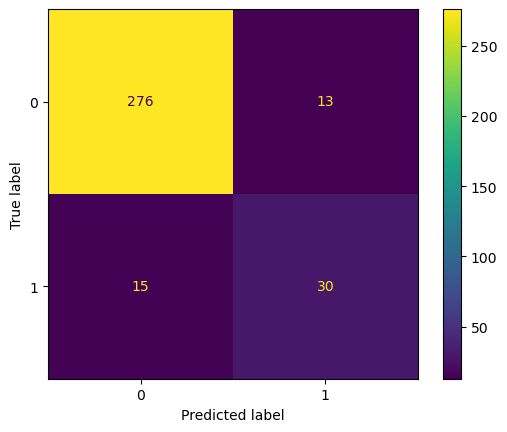

0.9191616766467066
[[269  17]
 [ 10  38]]


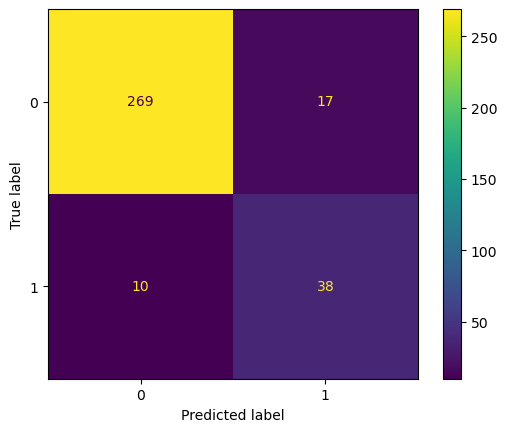

0.9341317365269461
[[283  14]
 [  8  29]]


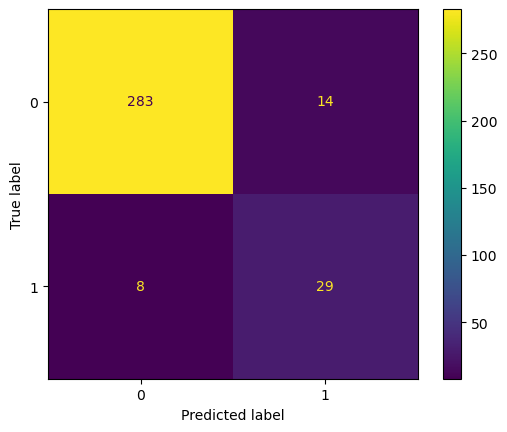

0.9309309309309309
[[286   8]
 [ 15  24]]


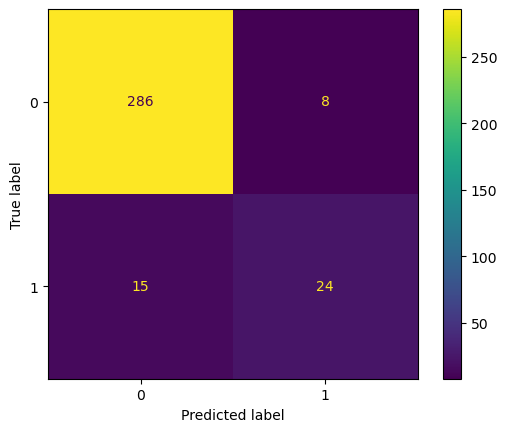

0.9219219219219219
[[278  13]
 [ 13  29]]


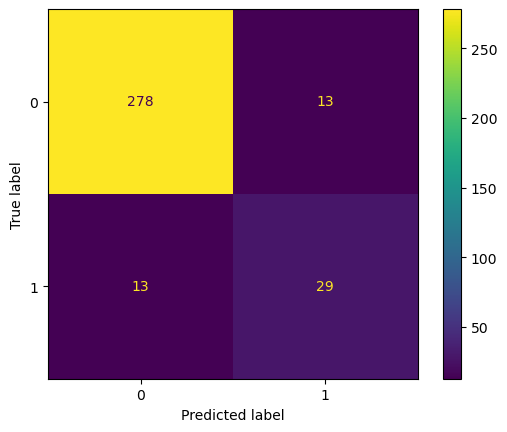

0.9279279279279279
[[259  13]
 [ 11  50]]


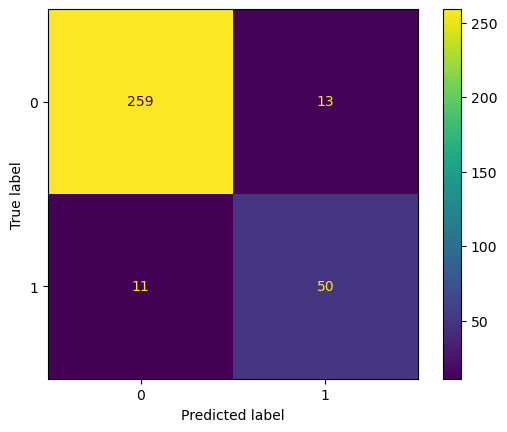

0.9129129129129129
[[275  16]
 [ 13  29]]


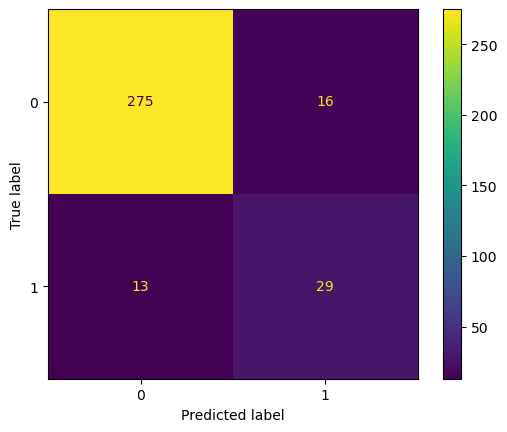

0.9129129129129129
[[259  13]
 [ 16  45]]


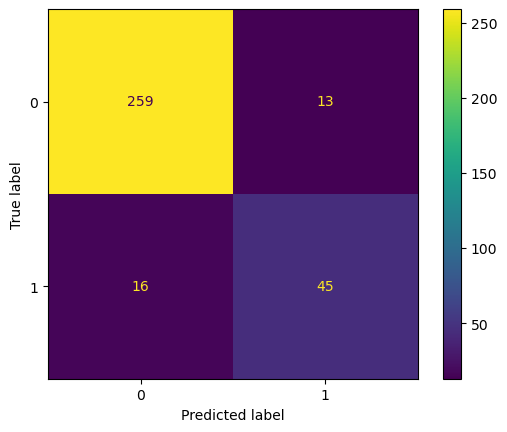

0.9039039039039038
[[262  10]
 [ 22  39]]


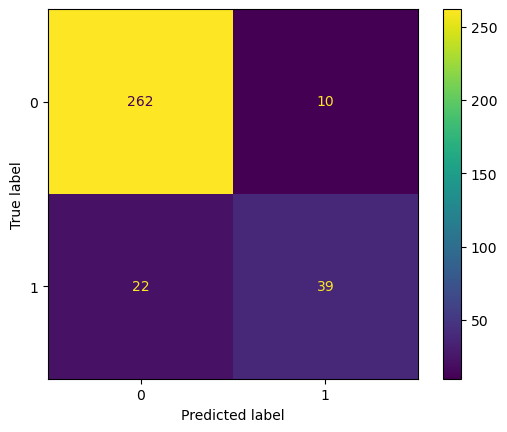

0.9279279279279279
[[269  17]
 [  7  40]]


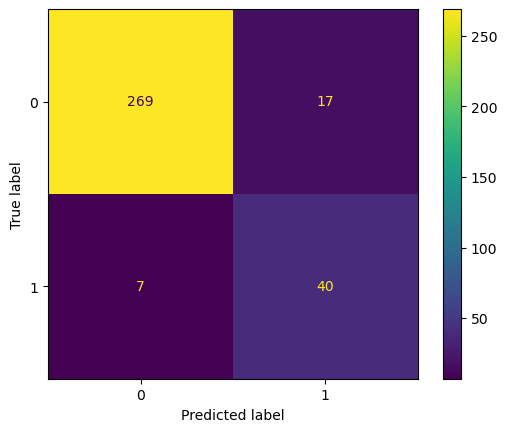

Result: 0.92 accuracy with a standard deviation of 0.01 



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

#loading data

df_contract_data = pd.read_csv('ContractData.csv')
df_calls_data = pd.read_csv('CallsData.csv')

#merging the datasets

df=pd.merge(df_contract_data, df_calls_data,how='inner', on=['Area Code','Phone'])

#Churn to nominal

df['Churn']=df['Churn'].astype('category')

df.columns

#define x and y

x = df.drop(['Churn','State','Phone'], axis = 1) #Retiramos as strings
y=df['Churn'].to_frame()

#using the classifier and evaluating the model's accuracy

clf = DecisionTreeClassifier(random_state=2021)

#Change hyperparameters of the Decision Tree(criterion and max_depth)

#clf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=2021)

#10-fold cross validation whith MEAN ACCURACY

scores = cross_val_score(clf,x,y,cv=10)
print(scores)
print("Result: %0.2f accuracy with a standard deviation of %0.2f \n" % (scores.mean(), scores.std()))

#using a different scoring metric - F1 MACRO

scores=cross_val_score(clf,x,y,cv=10,scoring='f1_macro') #a metrica de avaliação será o F1-Score macro, que é a média aritmética do F1-Score de todas as classes, 
print(scores)
print("RESULT: %0.2f f1_macro with a standard deviation of %0.2f \n"%(scores.mean(), scores.std()))

scores = []
kf = KFold(n_splits=10)
for train, test in kf.split(x):
    clf.fit(x.loc[train,:], y.loc[train,:])
    score=clf.score(x.loc[test,:],y.loc[test,:])
    print(score)
    scores.append(score)
    y_predicted = clf.predict(x.loc[test,:])
    print(confusion_matrix(y.loc[test,:], y_predicted))
    ConfusionMatrixDisplay.from_estimator(clf,x.loc[test,:],y.loc[test,:])
    plt.show()
print("Result: %0.2f accuracy with a standard deviation of %0.2f \n" % (np.mean(scores), np.std(scores)))
